Mean Absolute Error: 39345.21026666667


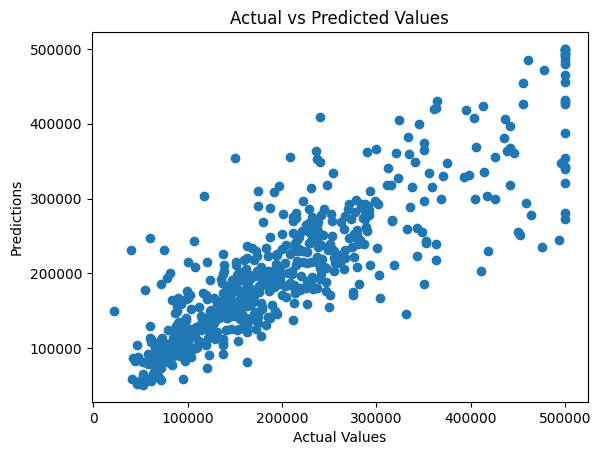

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Define features and target variable
X = data.drop(columns=["median_house_value"])
y = data["median_house_value"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate Mean Absolute Error
mae = abs(predictions - y_test).mean()
print("Mean Absolute Error:", mae)

# Visualize predictions vs actual values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values")
plt.show()


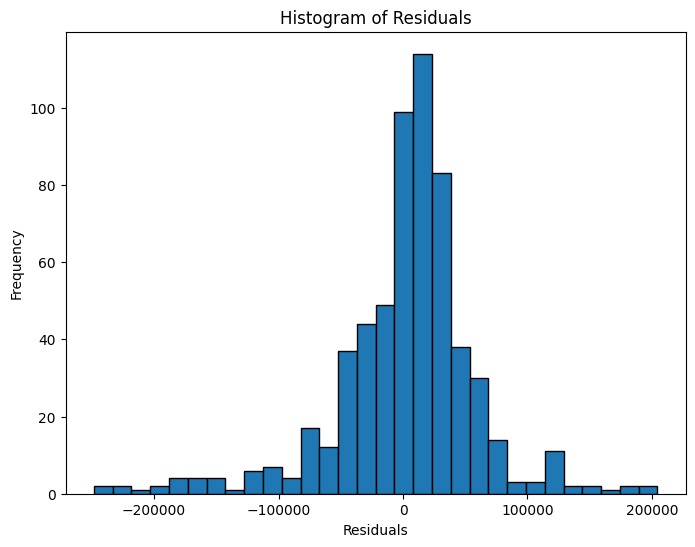

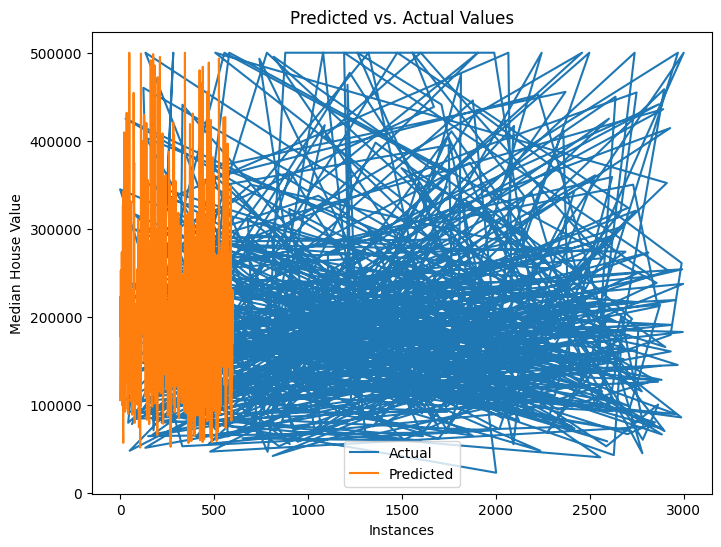

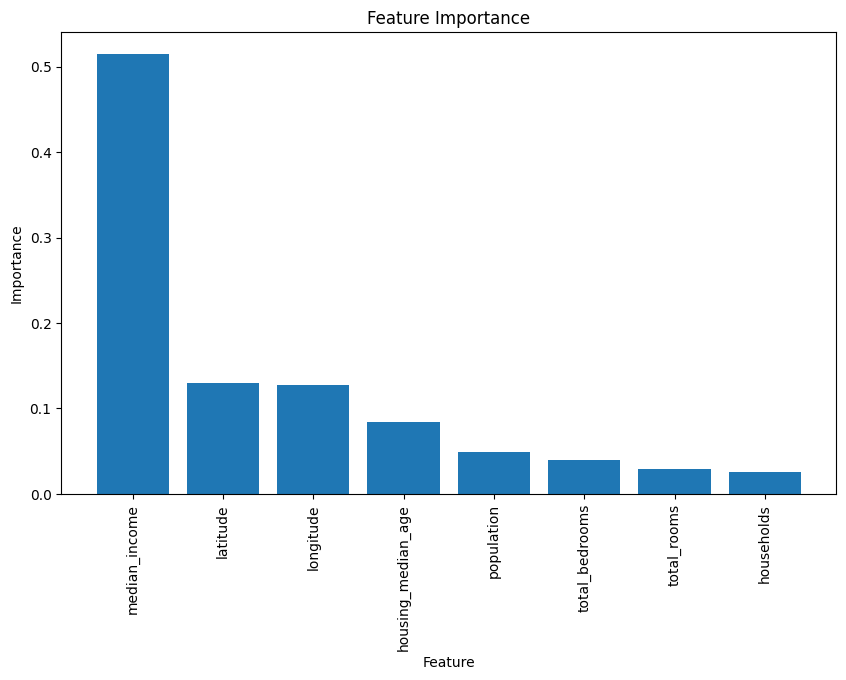

In [ ]:
# Histogram of Residuals
residuals = predictions - y_test
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Line Plot of Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Instances')
plt.ylabel('Median House Value')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

# Feature Importance Plot
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
